## Description of the project
You work in the Strimchik online store, which sells computer games all over the world. Historical game sales data, user and expert ratings, genres and platforms (such as Xbox or PlayStation) are available from public sources. You need to identify the patterns that determine the success of the game. This will allow you to bid on a potentially popular product and plan advertising campaigns.
Here is the data up to 2016. Let's say it's December 2016 and you're planning a campaign for 2017. It is necessary to work out the principle of working with data. It doesn't matter if you're forecasting 2017 sales based on 2016 data or 2027 sales based on 2026 data.

The abbreviation ESRB (Entertainment Software Rating Board) comes across in the data set - this is an association that determines the age rating of computer games. The ESRB evaluates game content and assigns it to an appropriate age rating, such as Mature, Toddler, or Teen.

### Project implementation instructions

**Step 1. Open the data file and examine the general information**
File path: /datasets/games.csv.

### Step 2: Prepare the data

- Change the column names (reduce to lower case);
- Convert the data to the required types. Describe in which columns the data type was changed and why;
- Handle missing values as needed: Explain why you filled in the missing value in a certain way or why you didn't;
- Describe the reasons that could lead to omissions;
- Notice the abbreviation 'tbd' in the user rating column. Separately parse this value and describe how to process it;
- Calculate the total sales in all regions and write them in a separate column.

### Step 3: Conduct an exploratory data analysis

- See how many games were released over the years. Is data for all periods important?
- See how sales have changed across platforms. Select the platforms with the highest total sales and plot the distribution by year. How long does it take for new platforms to appear and old ones to disappear?
- Take the data for the relevant actual period. Determine the current period yourself as a result of the study of the previous questions. The main factor is that these data will help build a forecast for 2017.
- Do not include data from previous years in your work.
- Which platforms are leading in sales, rising or falling? Pick a few potentially profitable platforms.
- Plot a box-and-whisker plot of global game sales by platform. Describe the result.
- See how sales within one popular platform are impacted by user and critic reviews. Plot a scatterplot and calculate the correlation between reviews and sales. Formulate conclusions.
- Correlate the findings with game sales on other platforms.
- Look at the overall distribution of games by genre. What about the most profitable genres? Do genres with high and low sales stand out?

### Step 4. Create a user profile for each region

- Define for the user of each region (NA, EU, JP):
- The most popular platforms (top 5). Describe the differences in sales shares.
- The most popular genres (top 5). Explain the difference.
- Does the ESRB rating affect sales in a particular region?

### Step 5. Test the hypotheses

- The average user ratings of the Xbox One and PC platforms are the same;
- The average user ratings of the genres Action and Sports are different.
- Set the alpha threshold yourself.
- Explain:
    - How did you formulate the null and alternative hypotheses;
    - What criterion was used to test the hypotheses and why.

### Step 6. Write a conclusion


**Data Description**
- Name - the name of the game
- Platform - platform
- Year_of_Release - year of release
- Genre - game genre
- NA_sales - sales in North America (millions of copies sold)
- EU_sales - sales in Europe (millions of copies sold)
- JP_sales - sales in Japan (millions of copies sold)
- Other_sales - sales in other countries (millions of copies sold)
- Critic_Score - Critics score (maximum 100)
- User_Score - user rating (maximum 10)
- Rating — rating from the ESRB (Entertainment Software Rating Board). This association determines the rating of computer games and assigns them an appropriate age category.

Data for 2016 may not be complete.

## Study plan:

1 - Initial visual evaluation of data
- Analysis of initial data
- Data type definition
- Identification of gaps
- Identification of duplicates


2 - Data preprocessing:
 - Renaming and processing data columns
 - Casting data to correct types
 - Elimination of duplicates in the data, if any
 - Identification and elimination of outliers in the data, if any
 - Elimination of gaps in the data, if necessary, a description of the reasons for the gaps
 - Pay attention to the abbreviation 'tbd' in the user rating column. Separately parse this value and describe how to process it.

        
3 - Working with data.
 - Calculate total sales in all regions


4 - Data analysis:
- See how many games were released in different years. Is data for all periods important?
- See how sales have changed across platforms. Select the platforms with the highest total sales and plot the distribution by year. How long does it take for new platforms to appear and old ones to disappear?

- Take the data for the relevant current period. Determine the current period yourself as a result of the study of the previous questions. The main factor is that these data will help build a forecast for 2017. Do not include data from previous years in your work.
- Which platforms are leading in sales, growing or falling? Pick a few potentially profitable platforms.
- Plot a box and mustache chart of global game sales by platform. Describe the result.
- See how sales within one popular platform are affected by user and critic reviews.
- Build a scatterplot and calculate the correlation between reviews and sales.
- Formulate conclusions. Correlate the findings with game sales on other platforms.
- Look at the overall distribution of games by genre. What about the most profitable genres? Do genres with high and low sales stand out?

5 - Make a portrait of the user of each region:
- Determine for the user of each region (NA, EU, JP): The most popular platforms (top 5). Describe the differences in sales shares. The most popular genres (top 5). Explain the difference. Does the ESRB rating affect sales in a particular region?

6 - Testing hypotheses:
- The average user ratings of the Xbox One and PC platforms are the same;
- The average user ratings of the genres Action and Sports are different.

Set the alpha threshold yourself.
Explain:
- How did you formulate the null and alternative hypotheses;
- What criterion was used to test the hypotheses and why.


7 - General conclusion

## Implementation of the project:

In [1]:
# Importing Libraries
from scipy import stats as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from IPython.display import display_html
import plotly.graph_objects as go

In [2]:
# Reading data from files. Because the project is running locally, then we use the try / except construct:
try:
    games = pd.read_csv('/datasets/games.csv', sep=',')
    
except:
    games = pd.read_csv('C:/Users/Админ/Desktop/Jupyter/Yandex/games.csv.', sep=',')
    

### 1 - Primary visual evaluation of data

In [3]:
# Display the first 5 rows of the dataset for visual evaluation of the data
games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
# Using the info() method, evaluate the data type in the columns and the size of the table
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
# Look at the number of missing in each column
games.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [6]:
# Create a function that counts the % missing in the data:
def isna_persent(data):
    for col in data.columns:
        pct_isna = np.mean(data[col].isna())
        print('{} - {}%'.format(col, round(pct_isna*100,2)))
        

In [7]:
isna_persent(games)

Name - 0.01%
Platform - 0.0%
Year_of_Release - 1.61%
Genre - 0.01%
NA_sales - 0.0%
EU_sales - 0.0%
JP_sales - 0.0%
Other_sales - 0.0%
Critic_Score - 51.32%
User_Score - 40.09%
Rating - 40.48%


In [8]:
# Check data for duplicates
games.duplicated().sum()

0

In [9]:
games['Name'].duplicated().sum()

5155

In [10]:
# See the number of unique games
games['Name'].unique().shape

(11560,)

In [11]:
# Check the data in the Genres column for implicit duplicates
games['Genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

In [12]:
# See the number of each game genre
games['Genre'].value_counts()

Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
Name: Genre, dtype: int64

In [13]:
# Check the data in the Platform column for implicit duplicates
games['Platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [14]:
# See the number of each platform
games['Platform'].value_counts()

PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
NES       98
GB        98
DC        52
GEN       29
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, dtype: int64

In [15]:
# Find out which ESRB Ratings are in the dataset
games['Rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [16]:
# See the number of each rating
games['Rating'].value_counts()

E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: Rating, dtype: int64

In [17]:
# Check the data in the User_Score column 
games['User_Score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [18]:
# Check the data in the User_Score column 
games['Critic_Score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

In [19]:
# Let's see the description of the data
games.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [20]:
games.describe(include = ['object'])

,Name,Platform,Genre,User_Score,Rating
count,16713,16715,16713,10014,9949
unique,11559,31,12,96,8
top,Need for Speed: Most Wanted,PS2,Action,tbd,E
freq,12,2161,3369,2424,3990


**Conclusion based on primary visual evaluation of the data:**
- Column names start with a capital letter, must be converted to lower case
- The data types need to be changed for the following columns:
  - Year_of_Release from float64 to int
  - User_Score from object to int
- Missing values in the data contain:
    - Name = 2
    - Year_of_Release = 269
    - Critic_Score = 8578
    - User_Score = 6701
    - Rating = 6766
- Duplicate content in game titles (about 30%). It is necessary to process duplicates, perhaps the same game was hosted on different platforms.
- Year of release starts from 1980 to 2016
- The largest revenue (check) from sales falls on North America (41.3), then Europe (28.9) and in last place Japan (10.22).
- Rating data in this column can be translated as:
  - E ("Everyone") - "For everyone" - the most popular rating
  - T ("Teen") - "Teens" - the second most popular
  - M ("Mature") - "For adults 17+" - the third place in popularity
  - E10+ ("Everyone 10 and older") - "For everyone from 10 years and older" - fourth place in popularity
  - EC ("Early childhood") - "For young children"
  - K-A ("Kids to Adults") - "For children and adults" (an outdated variation of the category "For everyone")
  - AO ("Adults Only 18+") - "Only for adults"
  - RP ("Rating Pending") - "Rating is expected"
  Missing values in the values of this column need to be handled - perhaps the missing values are specific to several specific games. Let's see it in data preprocessing.
- The most popular PS2 and DS platforms, the most unpopular GG and PCFX.
- The most popular Action genre and the most unpopular Puzzle
- In User_Score, the value "tbd" - TBD is an abbreviation of the English To Be Determined (to be determined) or To Be Decided (to be decided). It is used if some information is not yet determined or a decision on the issue has not been made. So you need to replace the data with Nan

### 2 - Data preprocessing:

  - Renaming and processing data columns
  - Replacing "tbd" in User_Score with Nan
  - Replace obsolete K-A values with E in Rating
  - Duplicate processing
  - Elimination of missing values in the data, description of the reasons for the gaps.
  - Replacing data types

In [21]:
# Convert the names of the columns in the data to lowercase:
games.columns = games.columns.str.lower()

In [22]:
# Replace data in games['user_score'] 'tbd' with 'Nan'
games['user_score'] = games['user_score'].replace('tbd', np.NaN)

In [23]:
# Replacing obsolete K-A values with E in Rating
games['rating'] = games['rating'].replace('K-A', 'E')

In [24]:
# Check for duplicate strings by common game name, platform, release year, and genre:
games[games.duplicated(subset=['name', 'platform', 'year_of_release', 'genre'], keep=False)]


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012.0,Sports,2.11,0.22,0.00,0.23,83.0,5.5,E
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN
16230,Madden NFL 13,PS3,2012.0,Sports,0.00,0.01,0.00,0.00,83.0,5.5,E


In [25]:
# These rows can be deleted - this is less than 1% of the data
games.drop(index = [659, 14244, 16230],axis = 0, inplace = True)
games.reset_index(drop=True)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16707,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16708,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16709,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16710,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [26]:
# During the initial visual evaluation of the data, a large number of duplicates were found in the name column.
# Consider the nature of their appearance:
games_duble = games.query('name.duplicated() == True')

In [27]:
games_duble['name'].value_counts()

Need for Speed: Most Wanted              11
LEGO Marvel Super Heroes                  8
Madden NFL 07                             8
Ratatouille                               8
FIFA 14                                   8
                                         ..
El Shaddai: Ascension of the Metatron     1
Dancing With The Stars                    1
Hot Wheels World Race                     1
Splatterhouse                             1
Winning Post 8 2016                       1
Name: name, Length: 2805, dtype: int64

In [28]:
# Let's look at the most common duplicates
games.query('name == "Need for Speed: Most Wanted"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
253,Need for Speed: Most Wanted,PS2,2005.0,Racing,2.03,1.79,0.08,0.47,82.0,9.1,T
523,Need for Speed: Most Wanted,PS3,2012.0,Racing,0.71,1.46,0.06,0.58,NaN,NaN,NaN
1190,Need for Speed: Most Wanted,X360,2012.0,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T
1591,Need for Speed: Most Wanted,X360,2005.0,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T
1998,Need for Speed: Most Wanted,XB,2005.0,Racing,0.53,0.46,0.00,0.05,83.0,8.8,T
2048,Need for Speed: Most Wanted,PSV,2012.0,Racing,0.33,0.45,0.01,0.22,NaN,NaN,NaN
3581,Need for Speed: Most Wanted,GC,2005.0,Racing,0.43,0.11,0.00,0.02,80.0,9.1,T
5972,Need for Speed: Most Wanted,PC,2005.0,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T
6273,Need for Speed: Most Wanted,WiiU,2013.0,Racing,0.13,0.12,0.00,0.02,NaN,NaN,NaN
6410,Need for Speed: Most Wanted,DS,2005.0,Racing,0.24,0.01,0.00,0.02,45.0,6.1,E


Nothing remarkable was found in the duplicates in the name column. Duplicate game titles differ by release year and platform

**Let's eliminate missing in the following data:**
- Year_of_Release     269
- User_Score         6701
- Critic_Score       8578
- Rating             6766

In [29]:
# Recheck % missing
isna_persent(games)

name - 0.0%
platform - 0.0%
year_of_release - 1.61%
genre - 0.0%
na_sales - 0.0%
eu_sales - 0.0%
jp_sales - 0.0%
other_sales - 0.0%
critic_score - 51.32%
user_score - 54.59%
rating - 40.47%


In [30]:
# Look at those missing from year_of_release:
games.query('year_of_release.isna() == True')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,NaN,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [31]:
# find what percentage these gaps take up from the total amount of data
(games['year_of_release'].isna().sum()/len(games['year_of_release']))*100 

1.6096218286261368

In [32]:
# 1.6% is a small amount of data, we can remove the release year missing in the data:
games = games.dropna(subset=['year_of_release'])

In [33]:
# Look at the values in critic_score, user_score and rating
score_isna = games.query('critic_score.isna() == True and user_score.isna() == True and rating.isna() == True ')
score_isna

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [34]:
# Let's try to determine the reason for such a large number of missing values.
# Let's try to see the summary table by year and by platform:
# First, let's look at the amount of pattern in missing values in the critics' ratings data:
score_isna_critic_pivot = score_isna.pivot_table(index = 'platform', columns = 'year_of_release', 
                                                 values = 'critic_score', aggfunc = 'count', fill_value='-')
score_isna_critic_pivot

year_of_release,1980.0,1981.0,1982.0,1983.0,1984.0,1985.0,1986.0,1987.0,1988.0,1989.0,...,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0
platform,,,,,,,,,,,,,,,,,,,,,
2600,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-,-,-,-,-,-,-,-,-,-
3DO,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
3DS,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,0.0,0.0,0.0,0.0,0.0,0.0
DC,-,-,-,-,-,-,-,-,-,-,...,0.0,0.0,-,-,-,-,-,-,-,-
DS,-,-,-,-,-,0.0,-,-,-,-,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-,-,-
GB,-,-,-,-,-,-,-,-,0.0,0.0,...,-,-,-,-,-,-,-,-,-,-
GBA,-,-,-,-,-,-,-,-,-,-,...,0.0,-,-,-,-,-,-,-,-,-
GC,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
GEN,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-


In [35]:
# Let's make the same table for rating from users:
score_isna_user_pivot = score_isna.pivot_table(index = 'platform', columns = 'year_of_release', 
                                                 values = 'user_score', aggfunc = 'count', fill_value='-')
score_isna_user_pivot

year_of_release,1980.0,1981.0,1982.0,1983.0,1984.0,1985.0,1986.0,1987.0,1988.0,1989.0,...,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0
platform,,,,,,,,,,,,,,,,,,,,,
2600,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-,-,-,-,-,-,-,-,-,-
3DO,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
3DS,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,0.0,0.0,0.0,0.0,0.0,0.0
DC,-,-,-,-,-,-,-,-,-,-,...,0.0,0.0,-,-,-,-,-,-,-,-
DS,-,-,-,-,-,0.0,-,-,-,-,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-,-,-
GB,-,-,-,-,-,-,-,-,0.0,0.0,...,-,-,-,-,-,-,-,-,-,-
GBA,-,-,-,-,-,-,-,-,-,-,...,0.0,-,-,-,-,-,-,-,-,-
GC,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
GEN,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-


In [36]:
# Let's make the same table for the rating:
score_isna_rating_pivot = score_isna.pivot_table(index = 'platform', columns = 'year_of_release', 
                                                 values = 'rating', aggfunc = 'count', fill_value='-')
score_isna_rating_pivot

year_of_release,1980.0,1981.0,1982.0,1983.0,1984.0,1985.0,1986.0,1987.0,1988.0,1989.0,...,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0
platform,,,,,,,,,,,,,,,,,,,,,
2600,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-,-,-,-,-,-,-,-,-,-
3DO,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
3DS,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,0.0,0.0,0.0,0.0,0.0,0.0
DC,-,-,-,-,-,-,-,-,-,-,...,0.0,0.0,-,-,-,-,-,-,-,-
DS,-,-,-,-,-,0.0,-,-,-,-,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-,-,-
GB,-,-,-,-,-,-,-,-,0.0,0.0,...,-,-,-,-,-,-,-,-,-,-
GBA,-,-,-,-,-,-,-,-,-,-,...,0.0,-,-,-,-,-,-,-,-,-
GC,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
GEN,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-


*Possible reasons for missing values:
The tables above show patterns - in each of the platforms, for a certain period of years, there are neither ratings from users and critics, nor ESRB ratings at the same time. It is possible that the games or the platforms themselves have lost their relevance or were not in demand at all.*

*The missing values in the critic_score and user_score columns cannot be handled - they cannot be filled with any mean or median value, as each game is an independent product. It is also impossible to delete rows with missing values in this data, since a significant amount of the original data will be lost. Since there are already 0 among the values in the ratings, the missing values cannot be replaced with 0 either, since 0 is still an estimate (the worst possible one). Putting a stub of -1 does not make sense, because if we need to compare which platforms the highest rated hits of all time were released on, even if such platforms no longer exist, then replacing the value with -1 reliably it will no longer be possible to calculate the maximum overall rating - in this case, -1 will be an even worse rating than 0. This means that in further similar calculations, it will be necessary to exclude values equal to -1 (values with a stub). In this case, is it worth filling in the missing values with anything at all, if these values have to be filtered out in the future? We can leave missing values.*

*As for the missing values in the Rating column, there are no categories assigned by the ESRB organization (organization for the USA and Canada). This means that games released, for example, in Europe, Japan or other countries may not have this category (this is a possible reason for omissions). Since we don't really know what age category the games belong to, we can put a "mix" stub.*


In [37]:
games['rating'] = games['rating'].fillna('mix')
games.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating                0
dtype: int64

**Replacing data types**:

In [38]:
# Now we can convert year_of_release data to int type
games['year_of_release'] = games['year_of_release'].astype(pd.Int32Dtype())


In [39]:
# Convert user_score data from object to float
games['user_score'] = games['user_score'].astype('float',errors='ignore')


In [40]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16443 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  Int32  
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     7982 non-null   float64
 9   user_score       7462 non-null   float64
 10  rating           16443 non-null  object 
dtypes: Int32(1), float64(6), object(4)
memory usage: 1.5+ MB


### 3 - Working with data.
  - Calculate total sales in all regions

In [41]:
games['total_sales'] = games[['na_sales','eu_sales', 'jp_sales','other_sales']].sum(axis = 1)

In [42]:
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,mix,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,mix,31.38


### 4 - Data analysis:
- 1 - See how many games were released in different years. Is data for all periods important?
- 2 - See how sales have changed by platform. Select the platforms with the highest total sales and plot the distribution by year. How long does it take for new platforms to appear and old ones to disappear?

Take the data for the relevant actual period. Determine the current period yourself as a result of the study of the previous questions. The main factor is that these data will help build a forecast for 2017. Do not include data from previous years in your work.
- 3 - Which platforms are leading in sales, rising or falling? Pick a few potentially profitable platforms.
- 4 - Plot a box-and-whisker plot of global game sales by platform. Describe the result.
- 5 - See how sales within one popular platform are affected by user and critic reviews. Build a scatterplot and calculate the correlation between reviews and sales. Formulate conclusions. Correlate findings with game sales on other platforms
- 6 - Look at the overall distribution of games by genre. What about the most profitable genres? Do genres with high and low sales stand out?

**1 - See how many games were released in different years. Is data for all periods important?**

In [43]:
# Create a table of data of interest to us:
year_games_count = games.groupby('year_of_release')['name'].count().reset_index()
#year_games_count


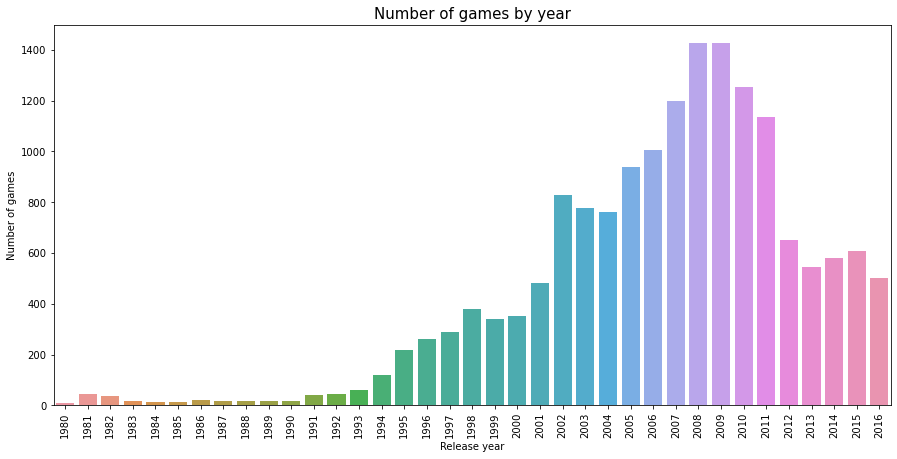

In [44]:
# Visualize the result:
plt.figure(figsize=(15,7))
sns.barplot(x='year_of_release', y='name', data=year_games_count)
plt.title('Number of games by year', fontsize=15)
plt.xlabel('Release year', fontsize=10)
plt.ylabel('Number of games', fontsize=10)
plt.xticks(rotation=90)
plt.show()

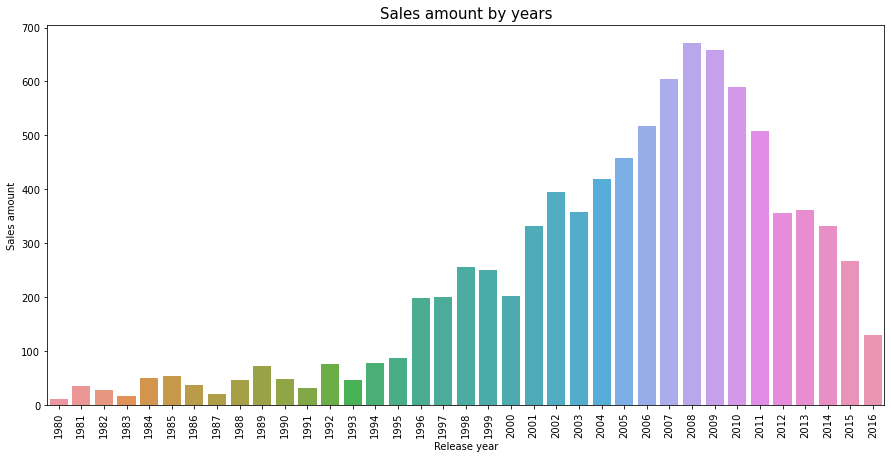

In [45]:
# Let's see how sales volumes change over the period under consideration:
year_games_sum = games.groupby('year_of_release')['total_sales'].sum().reset_index()

# Visualize the result:
plt.figure(figsize=(15,7))
sns.barplot(x='year_of_release', y='total_sales', data=year_games_sum)
plt.title('Sales amount by years', fontsize=15)
plt.xlabel('Release year', fontsize=10)
plt.ylabel('Sales amount', fontsize=10)
plt.xticks(rotation=90)
plt.show()

*I think that from the point of view of the task set in the project "Identify the patterns that determine the success of the game, which will allow you to bet on a potentially popular product and plan advertising campaigns." data on the number of games released in a given year is of historical value only. The only practical benefit we can draw from this data is the fact that the peak of the game development trend has passed (it was in 2007-2008). Now there is a downtrend. Less and less games are being released every year and, unfortunately, sales volumes are falling similarly to the trend of released games.

**2 - See how sales have changed by platform. Select the platforms with the highest total sales and plot the distribution by year. How long does it take for new platforms to appear and old ones to disappear?**

In [46]:
# Do the same for platform data:
platform_games_count = games.groupby('platform')['total_sales'].sum().reset_index()
platform_games_count = platform_games_count.sort_values('total_sales', ascending = False)
platform_games_count

,platform,total_sales
16,PS2,1233.56
28,X360,961.24
17,PS3,931.33
26,Wii,891.18
4,DS,802.78
15,PS,727.58
18,PS4,314.14
6,GBA,312.88
19,PSP,289.53
2,3DS,257.81


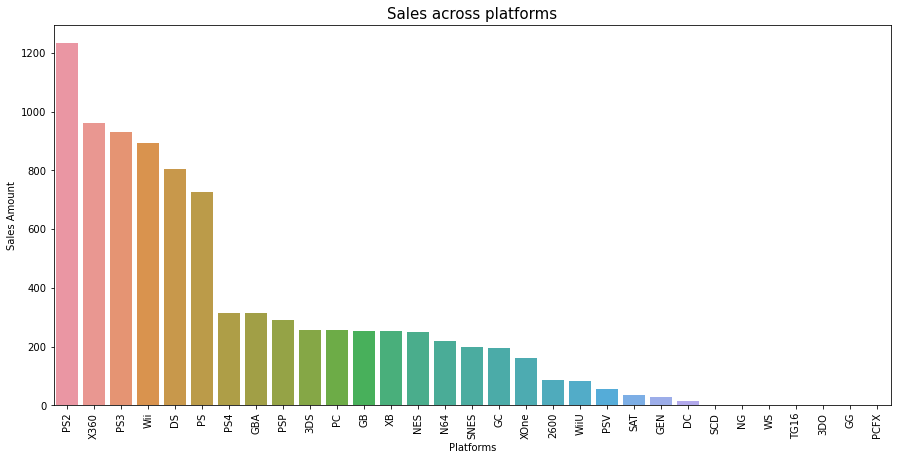

In [47]:
# Visualize the result:
plt.figure(figsize=(15,7))
sns.barplot(x='platform', y='total_sales', data=platform_games_count)
plt.title('Sales across platforms', fontsize=15)
plt.xlabel('Platforms', fontsize=10)
plt.ylabel('Sales Amount', fontsize=10)
plt.xticks(rotation=90)
plt.show()

In [48]:
# Delete entry 1985
games = games[~((games['year_of_release'] == 1985) & (games['platform'] == 'DS'))]

In [49]:
# As the most successful platforms, we will take the first 6 platforms from the sorted list: PS2, X360, PS3, Wii, DS, PS.
# Let's build the distribution by years for these platforms:
 
top_platform = ['PS2','X360','DS','PS3','Wii','PS']

top_platform_year_sales = (games.query('platform == @top_platform').pivot_table(
    index=['platform','year_of_release'], values='total_sales',aggfunc='sum', ))

top_platform_year_sales


total_sales
platform year_of_release             
DS       2004                   17.27
         2005                  130.14
         2006                  119.81
         2007                  146.94
         2008                  145.31
...                               ...
X360     2012                   99.74
         2013                   88.58
         2014                   34.74
         2015                   11.96
         2016                    1.52

[66 rows x 1 columns]

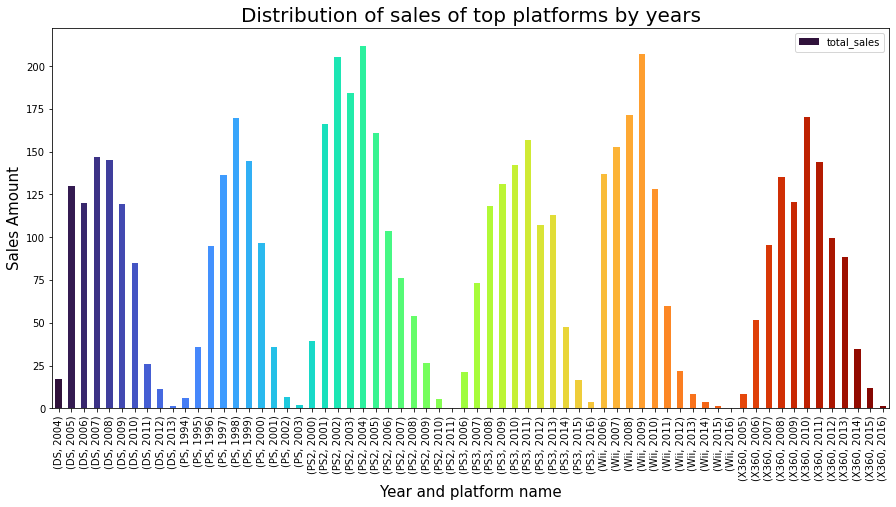

In [50]:
# build a graph for each of the top platforms
turbo_cm = plt.cm.get_cmap('turbo')
colors = [turbo_cm(v) for v in np.linspace(0,1,len(top_platform_year_sales))]

top_platform_year_sales.plot(y = 'total_sales', kind='bar', color = colors, figsize = (15, 7)) 

 
plt.xlabel("Year and platform name", fontsize=15)
plt.ylabel("Sales Amount", fontsize=15)
plt.title("Distribution of sales of top platforms by years", fontsize=20)
plt.show()


In [51]:
lifetime_games = games.pivot_table(index='platform', aggfunc={'year_of_release': ['min','max']}).reset_index()
lifetime_games['timelife'] = lifetime_games['year_of_release','max'] - lifetime_games['year_of_release','min']

lifetime_games = lifetime_games[lifetime_games['year_of_release','min'] >=2005]
lifetime_games

platform year_of_release       timelife
                        max   min         
2       3DS            2016  2011        5
17      PS3            2016  2006       10
18      PS4            2016  2013        3
20      PSV            2016  2011        5
26      Wii            2016  2006       10
27     WiiU            2016  2012        4
28     X360            2016  2005       11
30     XOne            2016  2013        3

In [52]:
lifetime_games['timelife'].describe()

count     8.000000
mean      6.375000
std       3.377975
min       3.000000
25%       3.750000
50%       5.000000
75%      10.000000
max      11.000000
Name: timelife, dtype: float64

In [53]:
lifetime_games['timelife'].median()

5.0

*Conclusion:*

- Answering the question "For what characteristic period do new platforms appear and old platforms disappear?" we can say that over the past 10 years (we are considering the segment from 2006), we have 7 new platforms, and we can also say that the median life expectancy of 1 platform is 5 years.

- Most successful platforms with the highest total sales: PS2, X360, PS3, Wii, PS. Their total revenue and life expectancy are:
   - PS2 - 1233.56 million - 11 years
   - X360 - 961.24 million - 11 years
   - PS3 - 928.77 million - 10 years
   - Wii - 891.18 million - 10 years
   - PS - 727.58 million - 9 years

**3- Which platforms are leading in sales, rising or falling? Select multiple potentially profitable platforms.**

*Take the data for the relevant actual period. Determine the current period yourself as a result of the study of the previous questions. The main factor is that these data will help build a forecast for 2017. Do not include data from previous years in your work.*

In [54]:
# To continue the study, we will take those platforms that continue to operate at the time of 2016

actual_platforms = games[games['year_of_release'] >= 2016]
actual_platforms['platform'].unique()

array(['PS4', '3DS', 'XOne', 'WiiU', 'PS3', 'PC', 'X360', 'PSV', 'Wii'],
      dtype=object)

In [55]:
# There are 9 such platforms. Let's take data on these platforms starting from 2014 (we will take 2 years for the current period):
actual_platforms_list = actual_platforms['platform']

actual_platforms_research = games.query('platform.isin(@actual_platforms_list)')
actual_platforms_research = actual_platforms_research[actual_platforms_research['year_of_release'] >= 2014 ]
actual_platforms_research


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,mix,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,mix,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,mix,7.98
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,mix,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,mix,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,mix,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,mix,0.01


In [56]:
# now create a table of current platforms and build a graph:

actual_platform_games = actual_platforms_research.pivot_table(index=['platform','year_of_release'], 
                                                              values='total_sales', aggfunc='sum')
actual_platform_games

total_sales
platform year_of_release             
3DS      2014                   43.76
         2015                   27.78
         2016                   15.14
PC       2014                   13.28
         2015                    8.52
         2016                    5.25
PS3      2014                   47.76
         2015                   16.82
         2016                    3.60
PS4      2014                  100.00
         2015                  118.90
         2016                   69.25
PSV      2014                   11.90
         2015                    6.25
         2016                    4.25
Wii      2014                    3.75
         2015                    1.14
         2016                    0.18
WiiU     2014                   22.03
         2015                   16.35
         2016                    4.60
X360     2014                   34.74
         2015                   11.96
         2016                    1.52
XOne     2014                   54.07
         2015                   60.14
         2016                   26.15

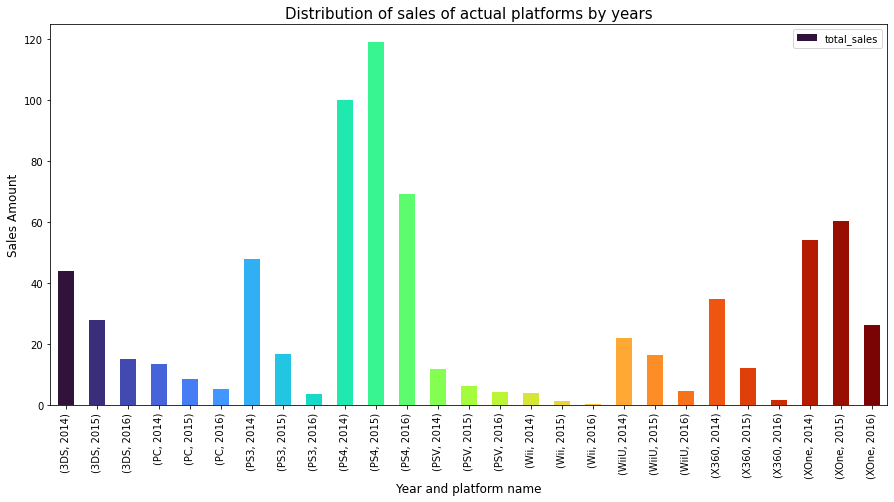

In [57]:
turbo_cm = plt.cm.get_cmap('turbo')
colors = [turbo_cm(v) for v in np.linspace(0,1,len(actual_platform_games))]


actual_platform_games.plot(y = 'total_sales', kind='bar', color= colors, figsize = (15, 7)) 

 
plt.xlabel("Year and platform name", fontsize=12)
plt.ylabel("Sales Amount", fontsize=12)
plt.title("Distribution of sales of actual platforms by years", fontsize=15)
plt.show()

*Conclusion:*
All current platforms are experiencing a sharp decline in sales by 2016. Despite the fact that in 2013-2014 there are significant jumps in revenue for platforms such as PS4, PS3, X360, at the time of 2016, PS4 and XOne have the best profit margins.

Potentially profitable platforms:
- PS4
- xOne

**4 - Plot a box-and-whisker plot of global game sales by platform. Describe the result.**

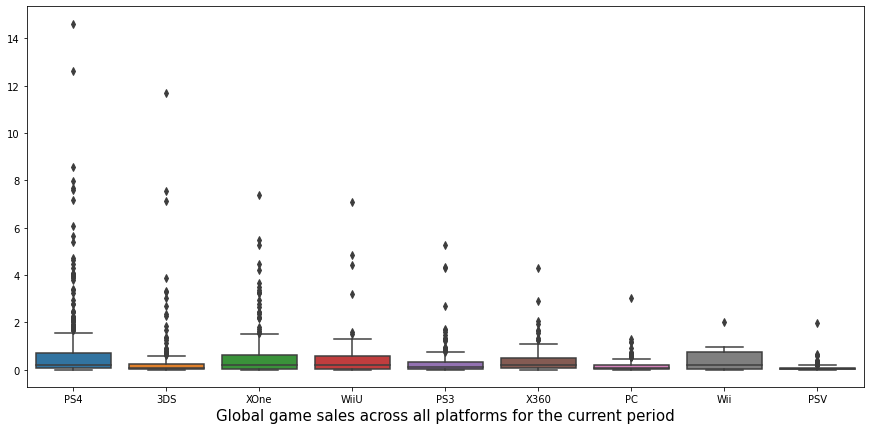

In [58]:
fig = plt.figure(figsize=(15,7))

ax = sns.boxplot(x='platform', y = 'total_sales', data = actual_platforms_research )
ax.set_xlabel('Global game sales across all platforms for the current period',fontsize=15)
ax.set_ylabel('',fontsize=15)

plt.show()

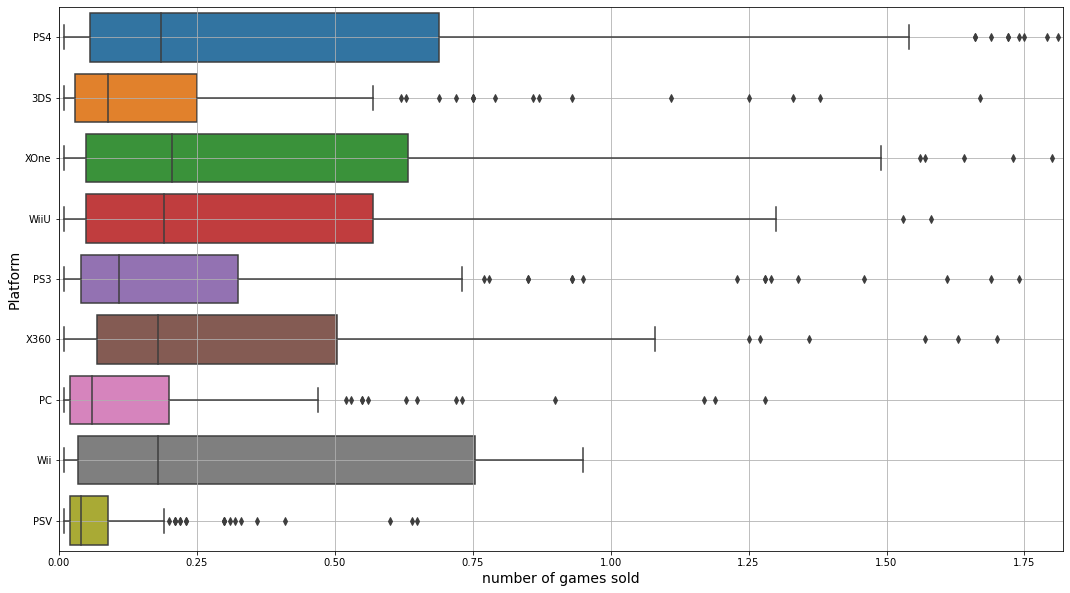

In [59]:
ax = plt.subplots(figsize=(18, 10))
ax = sns.boxplot( y=actual_platforms_research['platform'],x= actual_platforms_research['total_sales'], orient='h')
ax = plt.xlim(0, 1.82)
plt.ylabel('Platform', size=14)
plt.xlabel('number of games sold', size=14)
plt.grid(True)
plt.show()

In [60]:
# Additionally, display descriptions of the sales volume for each of the platforms:
actual_platform_games_describe = actual_platform_games.pivot_table(index = 'year_of_release', columns = 'platform', 
                                                                   values = 'total_sales')
actual_platform_games_describe.describe()

platform,3DS,PC,PS3,PS4,PSV,Wii,WiiU,X360,XOne
count,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
mean,28.893333,9.016667,22.726667,96.050000,7.466667,1.690000,14.326667,16.073333,46.786667
std,14.342445,4.037974,22.664795,25.059579,3.967472,1.847458,8.889411,16.987694,18.127748
min,15.140000,5.250000,3.600000,69.250000,4.250000,0.180000,4.600000,1.520000,26.150000
25%,21.460000,6.885000,10.210000,84.625000,5.250000,0.660000,10.475000,6.740000,40.110000
50%,27.780000,8.520000,16.820000,100.000000,6.250000,1.140000,16.350000,11.960000,54.070000
75%,35.770000,10.900000,32.290000,109.450000,9.075000,2.445000,19.190000,23.350000,57.105000
max,43.760000,13.280000,47.760000,118.900000,11.900000,3.750000,22.030000,34.740000,60.140000


In [61]:
actual_platform_games_describe.median().sort_values(ascending=False)

platform
PS4     100.00
XOne     54.07
3DS      27.78
PS3      16.82
WiiU     16.35
X360     11.96
PC        8.52
PSV       6.25
Wii       1.14
dtype: float64

Description of the result:
- The maximum spread of data on sales volume is observed for platforms:
   - PS4 = 25.059
   - PS3 = 22.664
   -Xone = 18.127
   - X360 = 16.987
   
- The maximum median values ​​are observed for platforms:
  - PS4 = 100.00
  - XOne = 54.07
  - 3DS = 27.78
  - PS3 = 16.82
  
- The maximum average values ​​are observed for the platforms:
  - PS4 = 96.050
  -XOne = 46.786
  - 3DS = 28.893
  
- Of this four, the smallest results in terms of sales volume include:
  - PS3 = 3.6
  
- Of this four, the maximum results in terms of sales include:
  - PS4 = 118.900
  - XOne = 60.140
  
- Of this four, the maximum values ​​for the 3rd quantile are:
  - PS4 = 109.45
  -XOne = 57.105
  
Based on the data obtained, we can conclude that the undisputed leader in terms of sales is the PS4 platform, followed by XOne.

**5 - See how sales within one popular platform are affected by user and critic reviews. Plot a scatterplot and calculate the correlation between reviews and sales. Formulate conclusions. Compare findings with game sales on other platforms**

In [62]:
# Consider the data on the example of the most profitable and popular PS4 platform:
# Display a table with user and critic reviews of the game, total sales and release year for this platform

ps4_score = (actual_platforms_research.query('platform == "PS4" and user_score >=1 and critic_score >=1')).pivot_table(
    index = ['year_of_release','name'],values = ['critic_score' , 'user_score', 'total_sales'],aggfunc = 'sum')
ps4_score['summary_score'] = ps4_score['critic_score']+ps4_score['user_score']

ps4_score

critic_score  total_sales  \
year_of_release name                                                        
2014            Alien: Isolation                        79.0         1.12   
                Assassin's Creed: Unity                 70.0         3.96   
                Bound By Flame                          53.0         0.20   
                Call of Duty: Advanced Warfare          83.0         7.66   
                Child of Light                          82.0         0.05   
...                                                      ...          ...   
2016            WWE 2K17                                69.0         0.60   
                Watch Dogs 2                            83.0         1.13   
                World of Final Fantasy                  77.0         0.34   
                Worms: WMD                              78.0         0.03   
                XCOM 2                                  88.0         0.14   

                                                user_score  summary_score  
year_of_release name                                                       
2014            Alien: Isolation                       8.1           87.1  
                Assassin's Creed: Unity                4.9           74.9  
                Bound By Flame                         5.9           58.9  
                Call of Duty: Advanced Warfare         5.7           88.7  
                Child of Light                         8.0           90.0  
...                                                    ...            ...  
2016            WWE 2K17                               6.9           75.9  
                Watch Dogs 2                           7.8           90.8  
                World of Final Fantasy                 8.3           85.3  
                Worms: WMD                             7.6           85.6  
                XCOM 2                                 8.0           96.0  

[234 rows x 4 columns]

In [63]:
ps4_score.corr()

,critic_score,total_sales,user_score,summary_score
critic_score,1.000000,0.401903,0.546434,0.996026
total_sales,0.401903,1.000000,-0.043186,0.372359
user_score,0.546434,-0.043186,1.000000,0.618852
summary_score,0.996026,0.372359,0.618852,1.000000


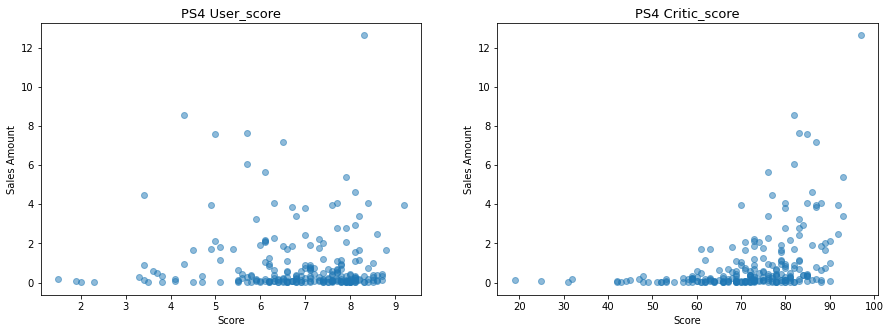

In [64]:
# Let's build a scatterplot:

fig = plt.figure(figsize =(15,5))

ax = fig.add_subplot(121)
ax.set_xlabel('Score')
ax.set_ylabel('Sales Amount')
ax = plt.title("PS4 User_score", fontsize=13)
ax=plt.scatter(x='user_score', y= 'total_sales', data=ps4_score , alpha = 0.5)


ax2 = fig.add_subplot(122)
ax2.set_xlabel('Score')
ax2.set_ylabel('Sales Amount')
ax2 = plt.title("PS4 Сritic_score", fontsize=13)
ax2=plt.scatter(x='critic_score', y= 'total_sales', data = ps4_score , alpha = 0.5)


plt.show()

*Conclusion:
Within the PS4 platform, critic reviews have a moderate impact on game sales than user reviews (have no effect):*
- user rating impact = -0.047
- influence of critics score = 0.401
- total influence = 0.372

*This is especially evident in the Critic_score chart.*

In [65]:
# Let's compare the findings with sales of games on other platforms:
XOne_score = (actual_platforms_research.query('platform == "XOne" and user_score >=1 and critic_score >=1')).pivot_table(
    index = ['year_of_release','name'], values = ['critic_score' , 'user_score', 'total_sales'],aggfunc = 'sum')
XOne_score['summary_score'] = XOne_score['critic_score']+XOne_score['user_score']

XOne_score.corr()


,critic_score,total_sales,user_score,summary_score
critic_score,1.000000,0.422112,0.440977,0.995699
total_sales,0.422112,1.000000,-0.091734,0.391611
user_score,0.440977,-0.091734,1.000000,0.522236
summary_score,0.995699,0.391611,0.522236,1.000000


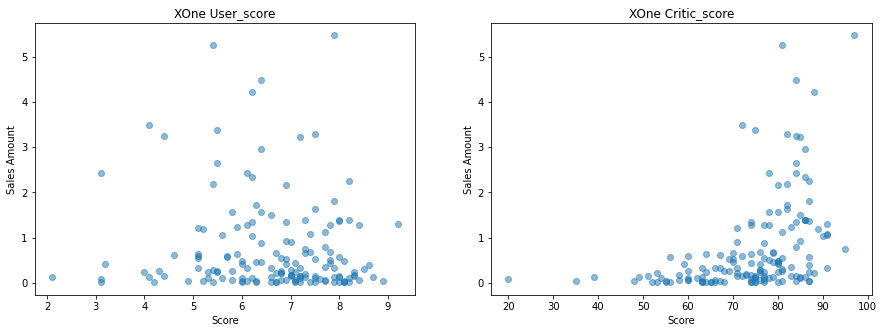

In [66]:
fig = plt.figure(figsize =(15,5))

ax = fig.add_subplot(121)
ax.set_xlabel('Score')
ax.set_ylabel('Sales Amount')
ax = plt.title('XOne User_score')
ax=plt.scatter(x='user_score', y= 'total_sales', data=XOne_score , alpha = 0.5)


ax2 = fig.add_subplot(122)
ax2.set_xlabel('Score')
ax2.set_ylabel('Sales Amount')
ax2 = plt.title('XOne Critic_score')
ax2=plt.scatter(x='critic_score', y= 'total_sales', data =XOne_score , alpha = 0.5)


plt.show()

In [67]:
PS3_score = (actual_platforms_research.query('platform == "PS3" and user_score >=1 and critic_score >=1')).pivot_table(
    index = ['year_of_release','name'], values = ['critic_score' , 'user_score', 'total_sales'],aggfunc = 'sum')
PS3_score['summary_score'] = PS3_score['critic_score']+PS3_score['user_score']

PS3_score.corr()

,critic_score,total_sales,user_score,summary_score
critic_score,1.000000,0.446575,0.693445,0.996690
total_sales,0.446575,1.000000,0.156595,0.427825
user_score,0.693445,0.156595,1.000000,0.749722
summary_score,0.996690,0.427825,0.749722,1.000000


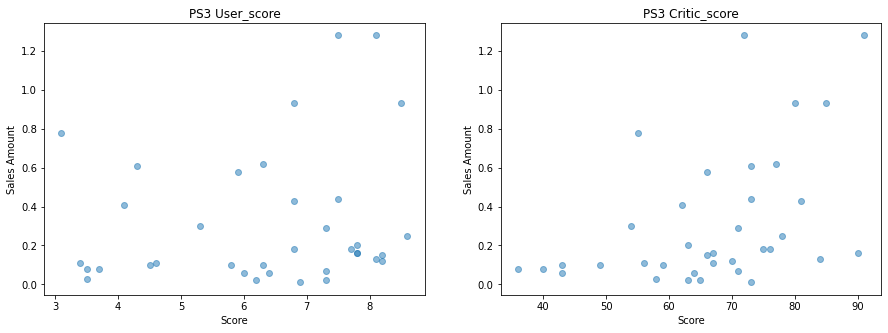

In [68]:
fig = plt.figure(figsize =(15,5))

ax = fig.add_subplot(121)
ax.set_xlabel('Score')
ax.set_ylabel('Sales Amount')
ax = plt.title('PS3 User_score')
ax=plt.scatter(x='user_score', y= 'total_sales', data=PS3_score , alpha = 0.5)


ax2 = fig.add_subplot(122)
ax2.set_xlabel('Score')
ax2.set_ylabel('Sales Amount')
ax2 = plt.title('PS3 Critic_score')
ax2=plt.scatter(x='critic_score', y= 'total_sales', data =PS3_score , alpha = 0.5)


plt.show()

In [69]:
X360_score = (actual_platforms_research.query('platform == "X360" and user_score >=1 and critic_score >=1')).pivot_table(
    index = ['year_of_release','name'], values = ['critic_score' , 'user_score', 'total_sales'],aggfunc = 'sum')
X360_score['summary_score'] = X360_score['critic_score'] + X360_score['user_score']

X360_score.corr()

,critic_score,total_sales,user_score,summary_score
critic_score,1.000000,0.525723,0.625309,0.997312
total_sales,0.525723,1.000000,0.336514,0.525040
user_score,0.625309,0.336514,1.000000,0.680805
summary_score,0.997312,0.525040,0.680805,1.000000


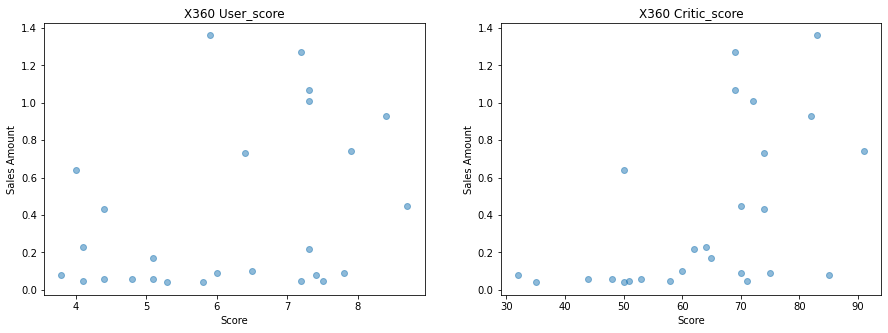

In [70]:
fig = plt.figure(figsize =(15,5))

ax = fig.add_subplot(121)
ax.set_xlabel('Score')
ax.set_ylabel('Sales Amount')
ax = plt.title('X360 User_score')
ax=plt.scatter(x='user_score', y= 'total_sales', data=X360_score , alpha = 0.5)


ax2 = fig.add_subplot(122)
ax2.set_xlabel('Score')
ax2.set_ylabel('Sales Amount')
ax2 = plt.title('X360 Critic_score')
ax2=plt.scatter(x='critic_score', y= 'total_sales', data =X360_score ,alpha = 0.5)


plt.show()

Estimation and Sales Volume Correlation Conclusion Ratio by PS4 Platform:
On platforms X360, XOne, PS3 - the distribution of data on scatterplots is basically identical - there is an increase in sales in proportion to the increase in valuation.

Of the above platforms, the most clear correlation between valuation and sales volume is seen on the following platforms:
- X360 = 0.525
- PS3 = 0.427

**6 - Look at the overall distribution of games by genre. What about the most profitable genres? Do genres with high and low sales stand out?**

In [71]:
# Let's look at the distribution of genres from our current data set (2014-2016):
# Which genres are released most often:
genre_research_count = actual_platforms_research.groupby('genre')['genre'].count()
genre_research_count = genre_research_count.sort_values(ascending = False)
genre_research_count

genre
Action          613
Role-Playing    221
Adventure       181
Sports          160
Shooter         128
Misc            111
Racing           69
Fighting         60
Simulation       44
Platform         38
Strategy         37
Puzzle           14
Name: genre, dtype: int64

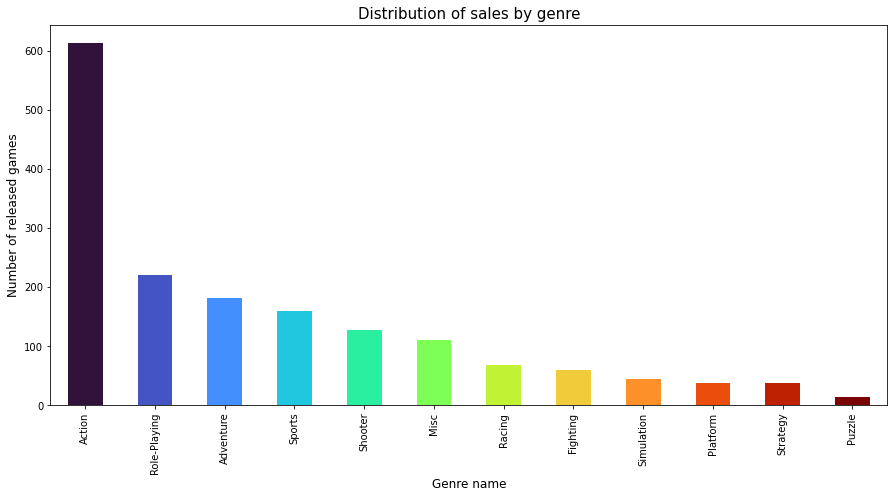

In [72]:
turbo_cm = plt.cm.get_cmap('turbo')
colors = [turbo_cm(v) for v in np.linspace(0,1,len(genre_research_count))]


genre_research_count.plot(y = 'count', kind='bar', color= colors, figsize = (15, 7)) 

 
plt.xlabel("Genre name", fontsize=12)
plt.ylabel("Number of released games", fontsize=12)
plt.title("Distribution of sales by genre", fontsize=15)
plt.show()

In [73]:
# Now let's see which genres bring in the most money:
genre_research_sales = actual_platforms_research.groupby('genre')['total_sales'].median()
genre_research_sales = genre_research_sales.sort_values(ascending=False)
genre_research_sales

genre
Shooter         0.515
Sports          0.190
Platform        0.140
Fighting        0.125
Role-Playing    0.110
Simulation      0.100
Action          0.090
Misc            0.090
Racing          0.090
Strategy        0.060
Puzzle          0.045
Adventure       0.030
Name: total_sales, dtype: float64

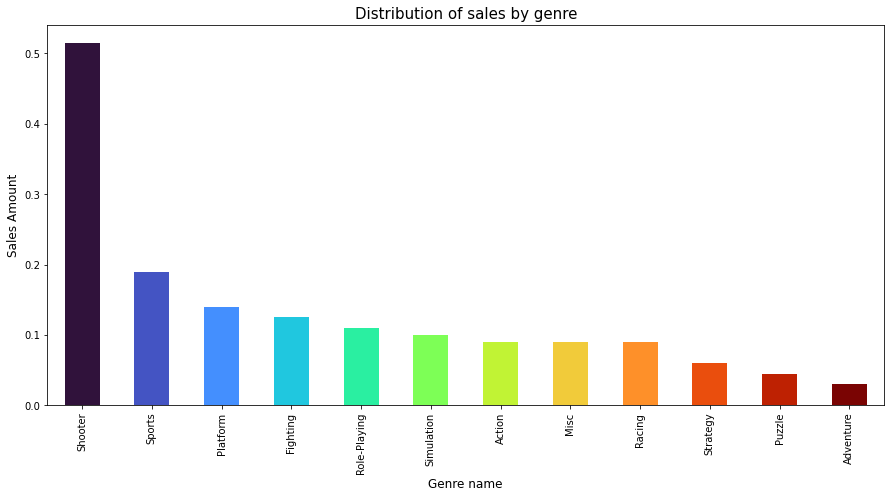

In [74]:
turbo_cm = plt.cm.get_cmap('turbo')
colors = [turbo_cm(v) for v in np.linspace(0,1,len(genre_research_sales))]


genre_research_sales.plot(y = 'total_sales', kind='bar', color= colors, figsize = (15, 7)) 

 
plt.xlabel("Genre name", fontsize=12)
plt.ylabel("Sales Amount", fontsize=12)
plt.title("Distribution of sales by genre", fontsize=15)
plt.show()

Conclusion:

Despite the fact that platforms most often release games in the Action genre, this genre brings very mediocre profits:
- Action = 0.110

The most profitable genres are:
- Shooter = 0.450
- Sports = 0.250
- Platform = 0.225

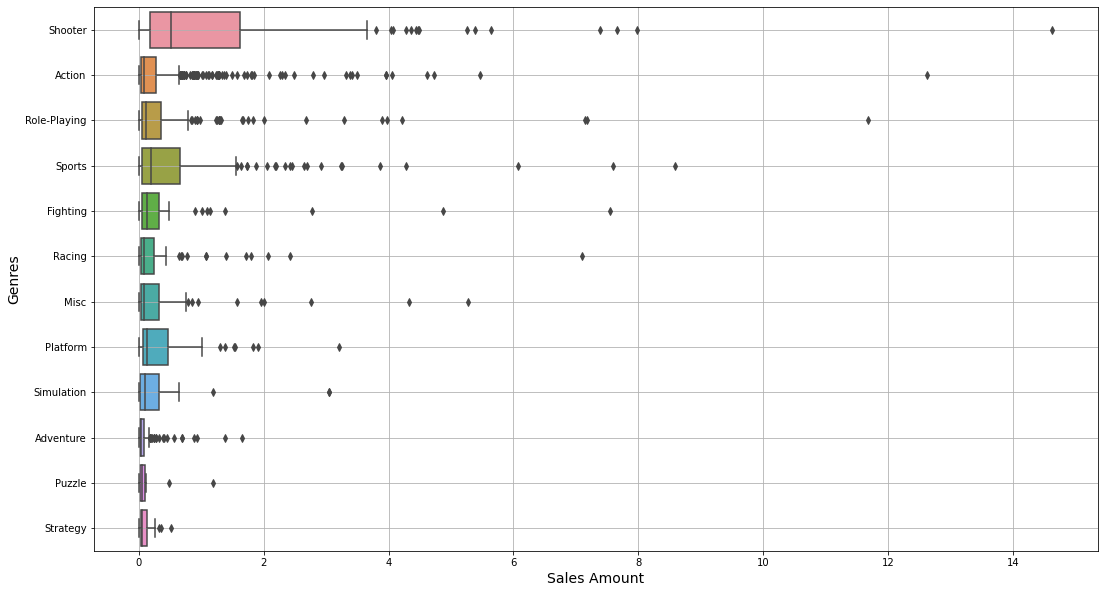

In [75]:
ax = plt.subplots(figsize=(18, 10))
ax = sns.boxplot( y=actual_platforms_research['genre'], x= actual_platforms_research['total_sales'], orient='h')

plt.ylabel('Genres', size=14)
plt.xlabel('Sales Amount', size=14)
plt.grid(True)
plt.show()

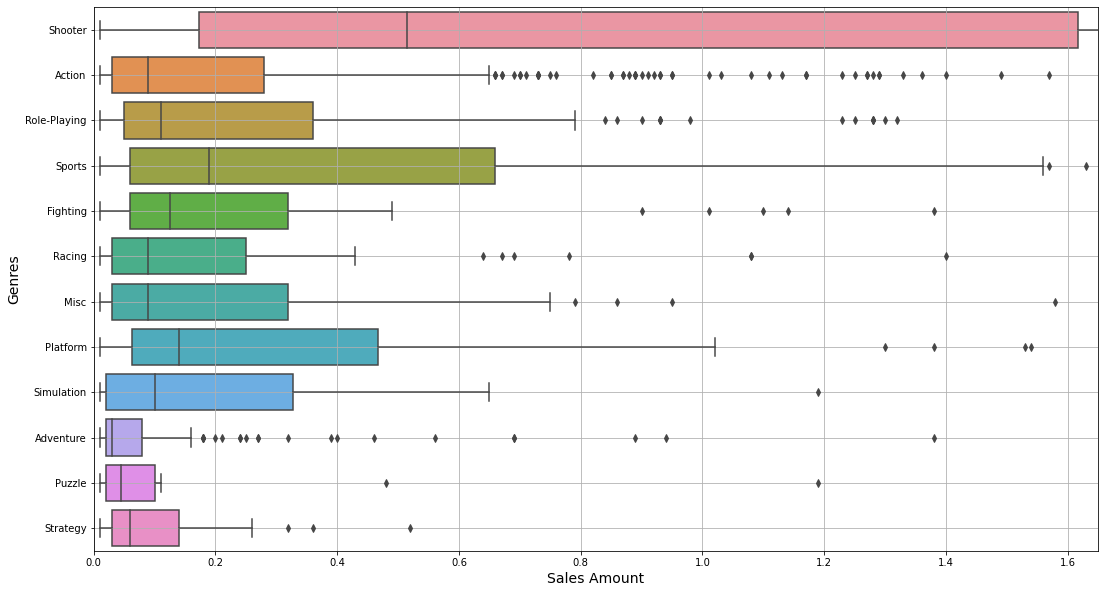

In [76]:
ax = plt.subplots(figsize=(18, 10))
ax = sns.boxplot( y=actual_platforms_research['genre'], x= actual_platforms_research['total_sales'], orient='h')
ax = plt.xlim(0, 1.65)
plt.ylabel('Genres', size=14)
plt.xlabel('Sales Amount', size=14)
plt.grid(True)
plt.show()

In [77]:
actual_genre_games_describe = actual_platforms_research.pivot_table(index = 'year_of_release', columns = 'genre', 
                                                                   values = 'total_sales')
actual_genre_games_describe.describe()

genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
count,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
mean,0.327297,0.099024,0.448232,0.320639,0.520573,0.113730,0.393873,0.443938,1.395409,0.329869,0.677256,0.108349
std,0.181279,0.045360,0.214167,0.252231,0.336247,0.101507,0.254797,0.094105,0.586239,0.205294,0.180871,0.018871
min,0.169157,0.068214,0.279375,0.081250,0.215333,0.010000,0.116250,0.336667,0.813191,0.105000,0.489375,0.086923
25%,0.228379,0.072980,0.327783,0.188958,0.340359,0.064167,0.282292,0.409615,1.100319,0.241167,0.590789,0.101274
50%,0.287600,0.077746,0.376190,0.296667,0.465385,0.118333,0.448333,0.482564,1.387447,0.377333,0.692203,0.115625
75%,0.406368,0.114429,0.532660,0.440333,0.673192,0.165595,0.532685,0.497574,1.686518,0.442303,0.771196,0.119063
max,0.525135,0.151111,0.689130,0.584000,0.881000,0.212857,0.617037,0.512584,1.985588,0.507273,0.850189,0.122500


In [78]:
actual_genre_games_describe.median().sort_values(ascending=False)

genre
Shooter         1.387447
Sports          0.692203
Role-Playing    0.482564
Platform        0.465385
Racing          0.448333
Simulation      0.377333
Fighting        0.376190
Misc            0.296667
Action          0.287600
Puzzle          0.118333
Strategy        0.115625
Adventure       0.077746
dtype: float64

We confirm the conclusion made earlier:
Despite the fact that platforms most often release games in the Action genre, this genre brings very mediocre profits:
- Action = 0.287

The most profitable genres are:
- Shooter = 1.387
- Sports = 0.692
- Platform = 0.465

### 5 - Create a user portrait for each region:

**Specify for user in each region (NA, EU, JP):**
- Most popular platforms (top 5). Describe the difference in sales shares.
- The most popular genres (top 5). Explain the difference.
- Does the ESRB rating affect sales in a particular region?

**Most popular platforms (top 5). Describe differences in share of sales.**

In [79]:
actual_platforms_research

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,mix,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,mix,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,mix,7.98
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,mix,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,mix,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,mix,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,mix,0.01


In [80]:
# Let's write a function that will group the data set by platform, search for sales volume by platform, sort
# received data and display top 5 platforms:

def top_platform(row):
    row_top_platform = actual_platforms_research.pivot_table(index='platform', values = row,
                                                             aggfunc='sum').sort_values(by=row, ascending=False)    
    row_top_platform.loc[('Other')] = round(row_top_platform.iloc[5:].sum()[0], 2)    
    row_top_platform['persent'] =  (row_top_platform[row] / row_top_platform[row].sum())*100
    row_top_platform =row_top_platform.sort_values(by=row, ascending=False)[:6]
    
    
    return row_top_platform

    
# Created a function that allows you to display results next to a friend:
def display_side_by_side(*args):
    html_str=' '
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

In [81]:
display_side_by_side(top_platform('na_sales'),top_platform('eu_sales'),top_platform('jp_sales'))

,na_sales,persent
platform,,
PS4,98.61,31.279937
XOne,81.27,25.779540
Other,31.19,9.893735
X360,28.30,8.977002
3DS,22.64,7.181602
PS3,22.05,6.994449
,eu_sales,persent
platform,,
PS4,130.04,42.574646


In [82]:
# Visualize data on pie charts:

def top_pie(row,ax):  
    title_dict = {'na_sales': 'Top platforms in North America', 'eu_sales': 'Top platforms in Europe', 'jp_sales': 'Top platforms in Japan'}
    pie_top = top_platform(row)       
    
    pie_top[row].plot(kind='pie', ax=axes[ax], autopct='%.0f%%', title=title_dict[row], rot=30)
    
    ax = plt.gca()
   

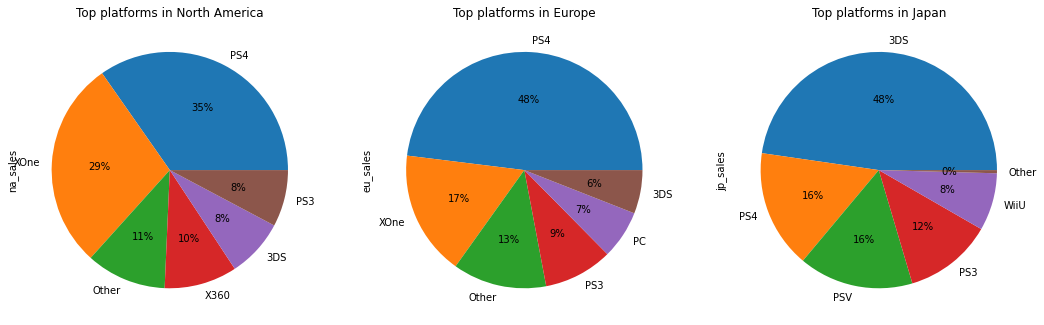

In [83]:
# display sales pie charts by region :

fig, axes, = plt.subplots(1, 3, figsize=(18,15))


top_pie('na_sales',0)
top_pie('eu_sales',1)
top_pie('jp_sales',2)


Description of the difference in proportions:
In North America, the most popular platforms are:
- PS4 - 35%
- XOne - 29%

In Europe, the most popular platforms are:
- PS4 - 48%
- XOne - 17%

In Japan, the most popular platforms are:
- 3DS - 48%
- PS4 - 16%
- PSV - 16%

**Most popular genres (top 5). Explain the difference**

In [84]:
# Let's write a function that will group the data set by genre, search for sales volume, sort
# received data and display top 5 genres:

def top_genre(row):    
    row_top_genre = actual_platforms_research.pivot_table(index='genre', values = row,aggfunc='sum').sort_values(by=row, ascending=False)
    row_top_genre.loc[('Other')] = round(row_top_genre.iloc[5:].sum()[0], 2)
    row_top_genre['persent'] =  (row_top_genre[row] / row_top_genre[row].sum())*100    
    row_top_genre = row_top_genre.sort_values(by=row, ascending=False)[:6]
    return row_top_genre

In [85]:
display_side_by_side(top_genre('na_sales'),top_genre('eu_sales'),top_genre('jp_sales'))

,na_sales,persent
genre,,
Shooter,79.02,24.546471
Action,72.53,22.530442
Sports,46.13,14.329647
Other,37.86,11.760686
Role-Playing,33.47,10.396993
Misc,15.05,4.675075
,eu_sales,persent
genre,,
Action,74.68,23.849519


In [86]:
# check

actual_platforms_research.pivot_table(index='genre', values = 'na_sales',aggfunc='sum').sort_values( by = 'na_sales')

,na_sales
genre,
Puzzle,0.65
Strategy,0.98
Simulation,2.63
Adventure,5.64
Platform,6.79
Racing,8.74
Fighting,12.43
Misc,15.05
Role-Playing,33.47


In [87]:
display_side_by_side(top_genre('na_sales'),top_genre('eu_sales'),top_genre('jp_sales'))

,na_sales,persent
genre,,
Shooter,79.02,24.546471
Action,72.53,22.530442
Sports,46.13,14.329647
Other,37.86,11.760686
Role-Playing,33.47,10.396993
Misc,15.05,4.675075
,eu_sales,persent
genre,,
Action,74.68,23.849519


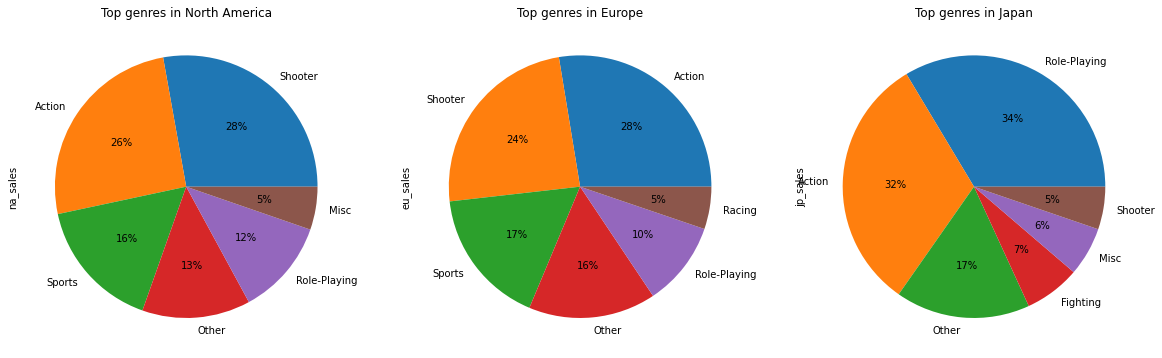

In [88]:
# Visualize data on pie charts:

def top_pie_genre(row,ax):

    title_dict = {'na_sales': 'Top genres in North America', 'eu_sales': 'Top genres in Europe', 'jp_sales': 'Top genres in Japan'}
    pie_top = top_genre(row)
    pie_top[row].plot(kind='pie', ax=axes[ax], autopct='%.0f%%', title=title_dict[row], rot=30)
    
    ax = plt.gca()

# display sales pie charts by region :
fig, axes = plt.subplots(1, 3, figsize=(20,15))
top_pie_genre('na_sales',0)
top_pie_genre('eu_sales',1)
top_pie_genre('jp_sales',2)

Description of the difference in proportions:
In North America, the most popular genres are:
- Shooter - 28%
- Action - 26%

The most popular genres in Europe are:
- Action - 28%
- Shooter - 24%

The most popular genres in Japan are:
- Role Playing - 34%
- Action - 32%

**Does the ESRB rating affect sales in a particular region?**

In [89]:
# Let's see which categories of games are the most profitable in different regions:

def top_rating(row):
    row_top_rating = actual_platforms_research.pivot_table(index='rating', values = row,aggfunc='sum')        
    row_top_rating['persent'] =  (row_top_rating[row] / row_top_rating[row].sum())*100
    row_top_rating = row_top_rating.sort_values(by=row, ascending=False)[:6]
    return row_top_rating

In [90]:
display_side_by_side(top_rating('na_sales'),top_rating('eu_sales'),top_rating('jp_sales'))

,na_sales,persent
rating,,
M,96.42,33.943533
mix,64.72,22.783919
E,50.74,17.862423
T,38.95,13.711892
E10+,33.23,11.698233
,eu_sales,persent
rating,,
M,93.44,34.520467
mix,58.95,21.778484


In [91]:
# Visualize data with pie charts:

def top_pie_rating(row,ax):
    title_dict = {'na_sales': 'Top genres in North America', 'eu_sales': 'Top genres in Europe', 'jp_sales': 'Top genres in Japan'}
    pie_top_rating = top_rating(row)
    pie_top_rating[row].plot(kind='pie', ax = axes[ax], autopct = '%.0f%%',  title=title_dict[row], rot=30)
    
    ax = plt.gca()
    

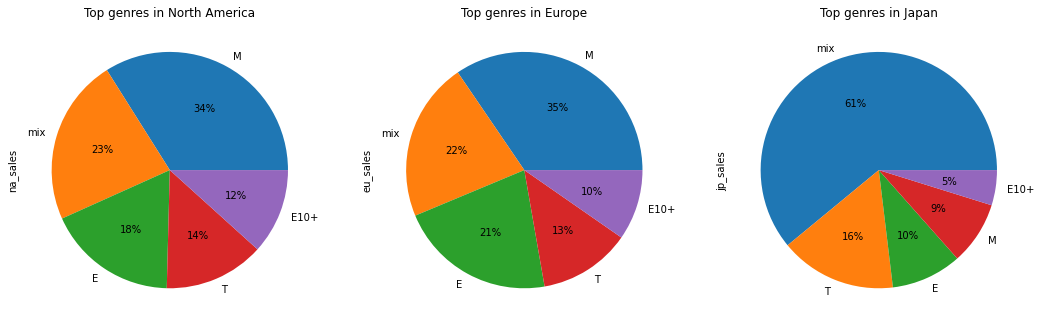

In [92]:
fig, axes = plt.subplots(1, 3, figsize=(18,15))

top_pie_rating('na_sales',0)
top_pie_rating('eu_sales',1)
top_pie_rating('jp_sales',2)

Description of the difference in proportions:

In North America, the most popular categories are:
- M ("For adults 17+") - 34%
- mix - 23%
- E ("For everyone from 10 years and older") - 18%

In Europe, the most popular categories are:
- M ("For adults 17+") - 35%
- E ("For everyone from 10 years and older") - 21%
- mix - 22%

In Japan, the most popular games that do not have an ESRB category are:
- mix - 61%

### 6 - Hypothesis testing:
- The average user ratings of the Xbox One and PC platforms are the same;
- The average user ratings of the genres Action and Sports are different.

Set the alpha threshold yourself.
Explain:
- How did you formulate the null and alternative hypotheses;
- What criterion was used to test the hypotheses and why.

**Formulation and testing of hypothesis No. 1:**

The average user ratings of the Xbox One and PC platforms are the same:
   - Null hypothesis - The average user ratings of the Xbox One and PC platforms are the same.
   - Alternative hyptosis - The average user ratings of the Xbox One and PC platforms are different.

In [93]:
# As samples, take the values from the current data set:
actual_platforms_no_nan = actual_platforms_research.query('user_score.isna() != True')


xone_sample = actual_platforms_no_nan.query('platform == "XOne"')
pc_sample = actual_platforms_no_nan.query('platform == "PC" ')

alpha = .05

results = st.ttest_ind(xone_sample['user_score'], pc_sample['user_score'],equal_var=False)

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print("Rejecting the null hypothesis ")
else:
    print("Failed to reject the null hypothesis. ") 

p-value:  0.11601398086668832
Failed to reject the null hypothesis. 


In [94]:
# check
actual_platforms_no_nan.platform.unique()


array(['PS4', 'WiiU', 'XOne', 'PS3', 'X360', '3DS', 'PC', 'Wii', 'PSV'],
      dtype=object)

In [95]:
#Let's test the hypothesis experimentally. Let's find the average user ratings of the Xbox One and PC platforms:
xone_rating = actual_platforms_no_nan[actual_platforms_no_nan['platform'] == "XOne"]['user_score'].mean()
xone_rating

6.594545454545453

In [96]:
pc_rating = actual_platforms_no_nan[actual_platforms_no_nan['platform'] == "PC"]['user_score'].mean()
pc_rating

6.298360655737703

Hypothesis Test Conclusion #1:

- the sample mean is significantly greater than the expected value of 0.05. therefore, the average user rating of the Xbox One platform is greater than the average user rating of the PC platform.
- empirically obtained the values ​​of the average user ratings of the platforms Xbox One and PC 6.594 and 6.298

**Formulation and testing of hypothesis No. 2**

Average user ratings for Action and Sports genres are different
    - Null Hypothesis - The average user ratings of the Action and Sports genres are the same.
    - Alternative hyptosis - Average user ratings of Action and Sports genres are different

In [97]:
action_sample = actual_platforms_no_nan.query('genre == "Action"')
sports_sample = actual_platforms_no_nan.query('genre == "Sports" ')

alpha = .05

results = st.ttest_ind(action_sample['user_score'], sports_sample['user_score'],equal_var=False)

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print("Reject the null hypothesis.")
else:
    print("Failed to reject the null hypothesis.") 

p-value:  1.1825550382644557e-14
Reject the null hypothesis.


In [98]:
# Let's test the hypothesis experimentally. Let's find the average user ratings of the Xbox One and PC platforms:
action_rating = actual_platforms_no_nan[actual_platforms_no_nan['genre'] == "Action"]['user_score'].mean()
action_rating

6.760606060606054

In [99]:
sports_rating = actual_platforms_no_nan[actual_platforms_no_nan['genre'] == "Sports"]['user_score'].mean()
sports_rating

5.225196850393697

Conclusion on testing hypothesis No. 2:

- the sample mean is significantly greater than the expected value of 0.05. , the average user ratings of the Action and Sports genres are different.
- empirically obtained the values ​​of the average user ratings of the genres Action and Sports 6.760 and 5.225

### 7 - General conclusion

The main objective of the project was to identify patterns that determine the success of the game.
Among the patterns found were:

**General trends in the gamedev market:**

The peak of the game development trend has passed (it fell on 2007-2008). Now there is a downtrend. Less and less games are released every year and, unfortunately, sales volumes are falling along with the trend of released games.

**Potentially profitable platforms:**
All current platforms are experiencing a sharp decline in sales by 2016. Despite the fact that in 2013-2014 there are significant jumps in revenue for platforms such as PS4, PS3, X360, at the time of 2016 the best profit indicators are:
- PS4 = 69.25 million
- XOne = 26.15 million

**Within the period 2013-2016, the sales figures of various platforms were considered. The following top platforms have been identified for this period:**

Description of the result:
- The maximum spread of data on sales volume is observed for platforms:
   - PS4 = 25.059
   - PS3 = 22.664
   -Xone = 18.127
   - X360 = 16.987
   
- The maximum median values ​​are observed for platforms:
  - PS4 = 100.00
  - XOne = 54.07
  - 3DS = 27.78
  - PS3 = 16.82
  
- The maximum average values ​​are observed for the platforms:
  - PS4 = 96.050
  -XOne = 46.786
  - 3DS = 28.893
  
- Of this four, the smallest results in terms of sales volume include:
  - PS3 = 3.6
  
- Of this four, the maximum results in terms of sales include:
  - PS4 = 118.900
  - XOne = 60.140
  
- Of this four, the maximum values ​​for the 3rd quantile are:
  - PS4 = 109.45
  -XOne = 57.105
  
Based on the data obtained, we can conclude that the undisputed leader in terms of sales is the PS4 platform, followed by XOne.

**Dependence of sales volume on user ratings:**

On platforms PS4, X360, XOne, PS3 - there is an increase in sales in proportion to the increasing valuation.
Of the above platforms, the most clear correlation between valuation and sales volume is seen on the following platforms:
- X360 = 0.525
- PS3 = 0.427

**Which genres are the most profitable in the context of 2014-2016**

Despite the fact that platforms most often release games in the Action genre, this genre brings very mediocre profits:
- Action = 0.287

The most profitable genres are:
- Shooter = 1.387
- Sports = 0.692
- Platform = 0.465


**Which platforms are the most popular for players in NA, EU, JP countries:**

In North America, the most popular platforms are:
- PS4 - 35%
- XOne - 29%

In Europe, the most popular platforms are:
- PS4 - 48%
- XOne - 17%

In Japan, the most popular platforms are:
- 3DS - 48%
- PS4 - 16%
- PSV - 16%

**Which genres are the most popular for players in NA, EU, JP countries:**

In North America, the most popular genres are:
- Shooter - 28%
- Action - 26%

The most popular genres in Europe are:
- Action - 28%
- Shooter - 24%

The most popular genres in Japan are:
- Role Playing - 34%
- Action - 32%

**What are the most popular ESRB game categories for players in NA, EU, JP:**

In North America, the most popular categories are:
- M ("For adults 17+") - 34%
- mix - 23%
- E ("For everyone from 10 years and older") - 18%

In Europe, the most popular categories are:
- M ("For adults 17+") - 35%
- E ("For everyone from 10 years and older") - 21%
- mix - 22%

In Japan, the most popular games that do not have an ESRB category are:
- mix - 61%